# 书面作业

## 1.请简略说明有监督学习和无监督学习的区别

    答：有监督学习，根据已有的数据集，知道输入和输出结果之间的关系。根据这种已知的关系，训练得到一个最优的模型。在监督学习中训练数据既有特征        (feature)又有标签(label)，通过训练，让机器可以自己找到特征和标签之间的联系，在面对只有特征没有标签的数据时，可以判断出标签。
       常见的有监督学习算法：回归分析和统计分类。最典型的算法是KNN和SVM。
       
       无监督学习，输入数据没有被标记，也没有确定的结果。样本数据类别未知，需要根据样本间的相似性对样本集进行分类（聚类，clustering）试图使        类内差距最小化，类间差距最大化。通俗点将就是实际应用中，不少情况下无法预先知道样本的标签，也就是说没有训练样本对应的类别，因而只能从        原先没有样本标签的样本集开始学习分类器设计。
       无监督学习的方法分为两大类：
       (1)一类为基于概率密度函数估计的直接方法：指设法找到各类别在特征空间的分布参数，再进行分类。
       (2)另一类是称为基于样本间相似性度量的简洁聚类方法：其原理是设法定出不同类别的核心或初始内核，然后依据样本与核心之间的相似性度量将样          本聚集成不同的类别。
       
       两者的区别：
       1.有监督学习方法必须要有训练集与测试样本。在训练集中找规律，而对测试样本使用这种规律。而非监督学习没有训练集，只有一组数据，在该组数        据集内寻找规律。
       2.有监督学习的方法就是识别事物，识别的结果表现在给待识别数据加上了标签。因此训练样本集必须由带标签的样本组成。而非监督学习方法只有要        分析的数据集的本身，预先没有什么标签。如果发现数据集呈现某种聚集性，则可按自然的聚集性分类，但不予以某种预先分类标签对上号为目的。
       3.非监督学习方法在寻找数据集中的规律性，这种规律性并不一定要达到划分数据集的目的，也就是说不一定要“分类”。

## 2.请搜索资料，列出至少6种传统机器学习模型

    答：线性分类器（LR)、支持向量机（SVM）、朴素贝叶斯（NB）、K近邻（KNN）、决策树（DT），隐马尔科夫模型（HMM）

## 3.请简略说明，为什么PR曲线能在正负样本极其不均衡的情况下很好地反映出模型真正地分类效果

    答：PR曲线，它是精确率（precision，简称P）和召回率（Recall，简称R）的关系曲线
       P=TP/(TP+FP),R=TP/(TP+FN)
       精确率P考量的数据中包括了正例和负例，因此，正负样本数量的变化会引起该值的变化，进而影响PR曲线对分类器的评价。

# 代码作业

已知给出图一的这些已标注点， 𝑥1,𝑥2分别代表该点的横纵坐标， 𝑦代表该点的分类标签（1或2，二分类），再给出图二的数据点，请用Python编写一段代码，按照课件中描述的步骤，找出它们的分类标签。请注意，此处k=1

图一
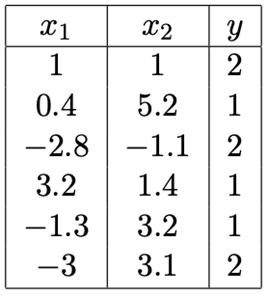


图二
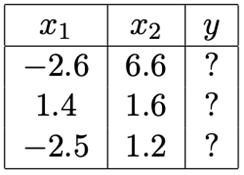

In [87]:
import numpy as np

def knn(train_set,test_set,k):
    print('='*50,'KNN开始计算，k={0}'.format(k),'='*50)
    train_set_x=np.array(train_set)[:,0:2]
    train_set_y=list(map(lambda x:tuple(x),train_set))
    test_set_x=np.array(test_set)
    test_set_y=[]
    for test_item in test_set_x:
        dict_result={}
        for i,train_item in enumerate(train_set_x):
            #计算与训练集每点的欧式距离
            dict_result[train_set_y[i]]=euclidean_metric(test_item,train_item)
        
        print('{1}测试集{0}{1}'.format(test_item,'='*50))
        print('{0}与训练集的欧式距离{0}'.format('='*50))
        print(dict_result)
        print('{0}欧式距离从小到大排序{0}'.format('='*50))
        #对训练集每点的欧式距离从小到大排序
        list_result_sorted=sorted(dict_result.items(), key=lambda item:item[1], reverse=False)
        print(list_result_sorted)
        print('{0}与训练集的最近的{1}个点{0}'.format('='*45,k))
        #找出离它最近的k个点
        list_result_by_k=list_result_sorted[0:k]
        print(list_result_by_k)
        
        #计算最近的k个点中，每个类别对应的数量
        dict_k={}
        for result_item in list_result_by_k:
            if str(result_item[0][2]) in dict_k:
                dict_k[str(result_item[0][2])]+=1
            else:
                dict_k[str(result_item[0][2])]=1
        #print(dict_k)
        #计算最近的k个点中，每个类别对应的数量从大到小排序
        list_k_sorted=sorted(dict_k.items(), key=lambda item:item[1], reverse=True)
        print('{0}与训练集的最近的{1}个点的类别数量分布(从大到小排列){0}'.format('='*40,k))
        print(list_k_sorted)
        #找到数量最多的那个类别
        test_set_y.append(int(list_k_sorted[0][0]))
        print('测试集{0}预测类别：{1}'.format(test_item,list_k_sorted[0][0]))
        print('\n')
    print('='*50,'结束计算','='*50)
    return test_set_y
    

# 计算两点间的欧式距离
def euclidean_metric(source,target):
    return np.sqrt(sum(np.power((source-target),2)))


train_set=[[1,1,2],[0.4,5.2,1],[-2.8,-1.1,2],[3.2,1.4,1],[-1.3,3.2,1],[-3,3.1,2]]
test_set=[[-2.6,6.6],[1.4,1.6],[-2.5,1.2]]

# 计算k=1的结果
k=1
test_set_y=knn(train_set,test_set,k)
print('结论：k={0}时，{1}的分类标签为{2}'.format(k,test_set,test_set_y))


print('\n','*'*100,'\n')
# 计算k=3的结果
k=3
test_set_y=knn(train_set,test_set,k)
print('结论：k={0}时，{1}的分类标签为{2}'.format(k,test_set,test_set_y))

    
    

================================================== KNN开始计算，k=1 ==================================================
==================================================测试集[-2.6  6.6]==================================================
==================================================与训练集的欧式距离==================================================
{(1, 1, 2): 6.657326790837295, (0.4, 5.2, 1): 3.3105890714493698, (-2.8, -1.1, 2): 7.702596964660684, (3.2, 1.4, 1): 7.789736837660179, (-1.3, 3.2, 1): 3.6400549446402586, (-3, 3.1, 2): 3.5227829907617068}
==================================================欧式距离从小到大排序==================================================
[((0.4, 5.2, 1), 3.3105890714493698), ((-3, 3.1, 2), 3.5227829907617068), ((-1.3, 3.2, 1), 3.6400549446402586), ((1, 1, 2), 6.657326790837295), ((-2.8, -1.1, 2), 7.702596964660684), ((3.2, 1.4, 1), 7.789736837660179)]
=============================================与训练集的最近的1个点=============================================
[((0.4, 5.2, 1), 3.31058